# EDA

### Data Sources

https://www.kaggle.com/ma7555/schengen-visa-stats

https://www.heritage.org/index/

https://worldmap.harvard.edu/data/geonode:country_centroids_az8


### Data Cleaning

In [439]:
import pandas as pd
%load_ext rpy2.ipython
%R library(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [440]:
# read in dataframes
df2017 = pd.read_csv('2017-data-for-consulates.csv')
df2018 = pd.read_csv('2018-data-for-consulates.csv')

In [441]:
# delete empty rows
df2017 = df2017.loc[(df2017['Schengen State'].notna())]
df2018 = df2018.loc[(df2018['Schengen State'].notna())]

In [442]:
# subset columns and change names
df2017.groupby(df2017['Country where consulate is located'])
df_cols = ['Schengen State', 'Country where consulate is located', 'Consulate', \
           'Total ATVs and uniform visas applied for', \
           'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) ']
new_cols = ['Schengen_State', 'Consulate_State', 'Consulate', 'Total_Applications', 'Total_Issued']
df2017 = df2017[df_cols]
df2017.columns = new_cols
df2018 = df2018[df_cols]
df2018.columns = new_cols

In [447]:
# clean two columns
def clean(df):
    for col in df.columns:
        if col == 'Total_Applications' or col == 'Total_Issued':
            df[col] = df[col].str.replace(',','')
            df[col] = df[col].astype(float)
    return df

In [448]:
df2017 = clean(df2017)
df2018 = clean(df2018)

In [449]:
# group by state and get aggregate sums
proportions2017 = df2017.groupby([df2017['Schengen_State']]).agg({'Total_Applications' : 'sum', 'Total_Issued' : 'sum'})
proportions2018 = df2018.groupby([df2018['Schengen_State']]).agg({'Total_Applications' : 'sum', 'Total_Issued' : 'sum'})
proportions2017 = proportions2017.reset_index()
proportions2018 = proportions2018.reset_index()
proportions2018.head(3)

,Schengen_State,Total_Applications,Total_Issued
0,Austria,306147.0,287049.0
1,Belgium,219861.0,174517.0
2,Czech Republic,662902.0,631581.0


In [450]:
# add years and convert from wide to long form
proportions2018['Year'] = pd.Series(['2018' for n in range(len(proportions2018))]) 
proportions2017['Year'] = pd.Series(['2017' for n in range(len(proportions2017))])
new = pd.concat([proportions2018, proportions2017], ignore_index = True)

In [451]:
new['Acceptance_Rate'] = new['Total_Issued'] / new['Total_Applications']
new.sort_values(by = ['Acceptance_Rate', 'Year'])

,Schengen_State,Total_Applications,Total_Issued,Year,Acceptance_Rate
40,Malta,37881.0,27924.0,2017,0.737151
15,Malta,32331.0,25123.0,2018,0.777056
1,Belgium,219861.0,174517.0,2018,0.793761
26,Belgium,231482.0,185888.0,2017,0.803034
19,Portugal,266580.0,222384.0,2018,0.834211
6,France,4012771.0,3350547.0,2018,0.834971
44,Portugal,263538.0,224178.0,2017,0.850648
23,Sweden,253297.0,216238.0,2018,0.853693
16,Netherlands,683505.0,586130.0,2018,0.857536
31,France,3686127.0,3166132.0,2017,0.858932


### Explore data with graphs

In [452]:
# Acceptance (issuance), rejection rates grouped by each country (stacked bar) 
# with heights being total applications. Do 2017 and 2018 side by side

In [453]:
%R -i proportions2017 -i proportions2018 -i new

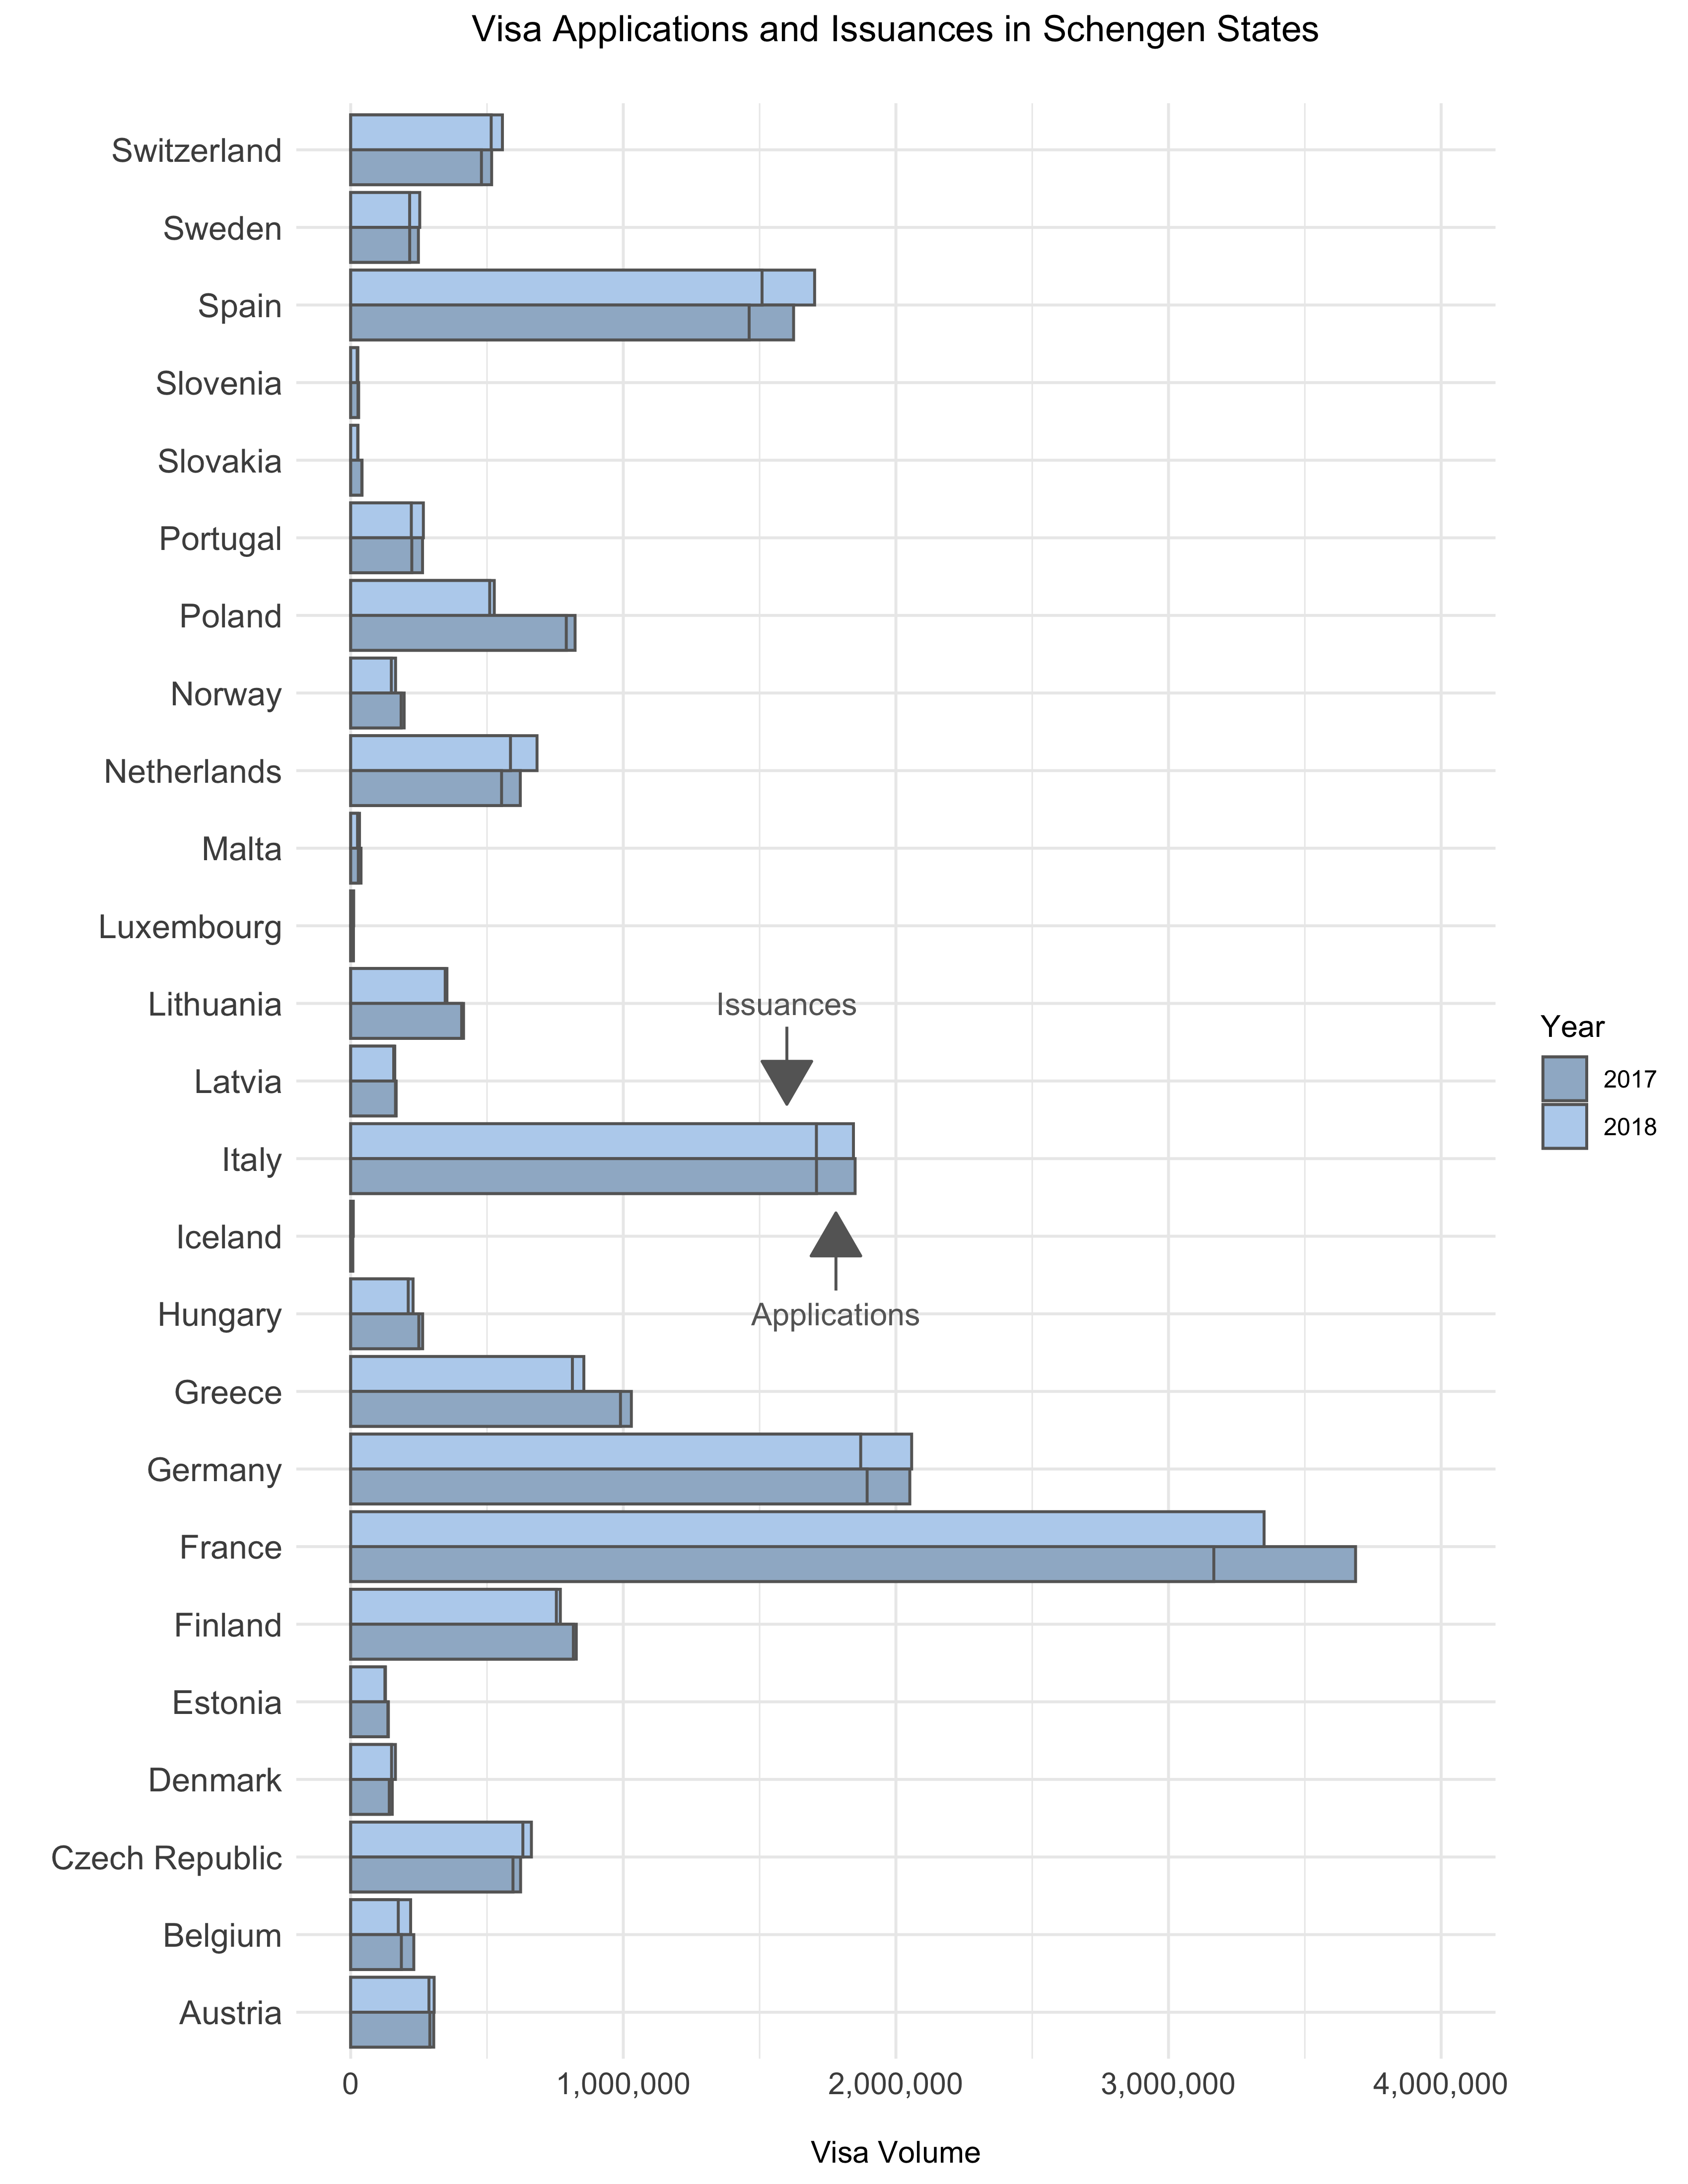

In [454]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + 
geom_col(aes(x = Schengen_State, y = Total_Applications, fill = Year), color = 'gray40', position = 'dodge', data = new) +
geom_col(aes(x = Schengen_State, y = Total_Issued, fill = Year), color = 'gray40', position = 'dodge', data = new) +
scale_fill_manual(values = c('2017'='slategray3','2018'='slategray2')) +
scale_y_continuous(limits = c(0, 4000000), breaks = seq(0, 4000000, by = 1000000), labels = scales::comma) +
labs(title = 'Visa Applications and Issuances in Schengen States\n', y = '\nVisa Volume', x = '') +
theme_minimal() +
theme(plot.title = element_text(hjust = 0.5), axis.text.y = element_text(size = 12), axis.text.x = element_text(size = 11))+ 
geom_segment(aes(x = 10.3, y = 1780000, xend = 11.3, yend = 1780000), arrow = arrow(type = 'closed'), color = 'gray40', arrow.fill = 'gray40') +
geom_segment(aes(x = 13.7, y = 1600000, xend = 12.7, yend = 1600000), arrow = arrow(type = 'closed'), color = 'gray40', arrow.fill = 'gray40') +
annotate("text", x = 10, y = 1780000, label = "Applications", size = 4, color = 'gray40') +
annotate("text", x = 14, y = 1600000, label = "Issuances", size = 4, color = 'gray40') +
coord_flip()

#ggsave('Applications_Issuances.pdf')


In [455]:
# we see france has the largest proportions of rejections, 
# but also the highest application volume
# look into how Schengen countries GDPs compare on a line / scatter / treemap 

In [456]:
# read in dfs
efi_2018 = pd.read_csv('index2018_data.csv')
efi_2018.sort_values(by = ['2018 Score'], ascending = False, inplace = True)
efi_2017 = pd.read_csv('index2017_data.csv')
efi_2017.sort_values(by = ['2017 Score'], ascending = False, inplace = True)

In [457]:
# clean columns
efi_columns = ['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', \
               '2018 Score', 'Tariff Rate (%)', 'Trade Freedom', 'Population (Millions)', \
              'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'FDI Inflow (Millions)', \
               'Unemployment (%)', 'Inflation (%)', 'Public Debt (% of GDP)']
efi_columns2 = ['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', \
               '2017 Score', 'Tariff Rate (%)', 'Trade Freedom', 'Population (Millions)', \
              'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'FDI Inflow (Millions)', \
               'Unemployment (%)', 'Inflation (%)', 'Public Debt (% of GDP)']
efi_2018 = efi_2018[efi_columns]
efi_2017 = efi_2017[efi_columns2]
efi_2018.columns = ['CountryID', 'Country_Name', 'Region', 'World_Rank', 'Region_Rank', \
               'Score_2018', 'Tariff_Rate_Pct', 'Trade_Freedom', 'Population_MM', \
              'GDP_Billions_PPP', 'GDP_per_Capita_PPP', 'FDI_Inflow_MM', \
               'Unemployment_Pct', 'Inflation_Pct', 'Public_Debt_PctofGDP']
efi_2017.columns = ['CountryID', 'Country_Name', 'Region', 'World_Rank', 'Region_Rank', \
               'Score_2017', 'Tariff_Rate_Pct', 'Trade_Freedom', 'Population_MM', \
              'GDP_Billions_PPP', 'GDP_per_Capita_PPP', 'FDI_Inflow_MM', \
               'Unemployment_Pct', 'Inflation_Pct', 'Public_Debt_PctofGDP']
efi_2018.head(3)

,CountryID,Country_Name,Region,World_Rank,Region_Rank,Score_2018,Tariff_Rate_Pct,Trade_Freedom,Population_MM,GDP_Billions_PPP,GDP_per_Capita_PPP,FDI_Inflow_MM,Unemployment_Pct,Inflation_Pct,Public_Debt_PctofGDP
70,71,Hong Kong,Asia-Pacific,1.0,1.0,90.2,0.0,90.0,7.4,$429.7,"$58,321.6","108,126.0",3.4,2.6,0.1
146,147,Singapore,Asia-Pacific,2.0,2.0,88.8,0.0,90.0,5.6,$492.6,"$87,855.4","61,596.7",1.8,-0.5,112.0
119,120,New Zealand,Asia-Pacific,3.0,3.0,84.2,1.3,87.4,4.7,$177.0,"$37,294.0","2,291.6",5.2,0.6,29.5


In [458]:
#drop na
efi_2018 = efi_2018.loc[(efi_2018['Country_Name'].notna())]
efi_2017 = efi_2017.loc[(efi_2017['Country_Name'].notna())]

In [459]:
# get just Schengen countries
schengen_efi_2017 = efi_2017.loc[(efi_2017['Country_Name'].isin(['Austria', 'Belgium', 'Czech Republic', \
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', \
        'Iceland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', \
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', \
       'Slovenia', 'Spain', 'Sweden', 'Switzerland']))]
schengen_efi_2018 = efi_2018.loc[(efi_2018['Country_Name'].isin(['Austria', 'Belgium', 'Czech Republic', \
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', \
        'Iceland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', \
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', \
       'Slovenia', 'Spain', 'Sweden', 'Switzerland']))]

In [460]:
# add year and merge dfs
schengen_efi_2018['Year'] = pd.Series([2018 for n in range(len(schengen_efi_2018))])
schengen_efi_2017['Year'] = pd.Series([2017 for n in range(len(schengen_efi_2017))])

gdp = schengen_efi_2018.merge(schengen_efi_2017, on = 'Country_Name', how = 'left')


/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [461]:
gdp = pd.melt(gdp, id_vars = ['CountryID_x'], value_vars = ['GDP_Billions_PPP_x','GDP_Billions_PPP_y'])
gdp.sample(10).T

,44,23,20,22,43,5,39,42,2,24
CountryID_x,58,64,58,80,149,157,132,152,73,158
variable,GDP_Billions_PPP_y,GDP_Billions_PPP_x,GDP_Billions_PPP_x,GDP_Billions_PPP_x,GDP_Billions_PPP_y,GDP_Billions_PPP_x,GDP_Billions_PPP_y,GDP_Billions_PPP_y,GDP_Billions_PPP_x,GDP_Billions_PPP_y
value,"$2,646.9",$289.4,"$2,733.7","$2,234.5",$64.0,$498.1,"$1,005.4","$1,615.1",$16.5,$482.3


In [462]:
countries = schengen_efi_2018[['CountryID', 'Country_Name']]

In [463]:
gdp = gdp.merge(countries, left_on = 'CountryID_x', right_on = 'CountryID', how = 'left')
#gdp = gdp.drop(['CountryID_x', 'CountryID'], axis = 1)
gdp.loc[(gdp.variable == 'GDP_Billions_PPP_x'), 'Year'] = 2018
gdp.loc[(gdp.variable == 'GDP_Billions_PPP_y'), 'Year'] = 2017
gdp

,CountryID_x,variable,value,CountryID,Country_Name,Year
0,158,GDP_Billions_PPP_x,$496.0,158,Switzerland,2018.0
1,54,GDP_Billions_PPP_x,$38.5,54,Estonia,2018.0
2,73,GDP_Billions_PPP_x,$16.5,73,Iceland,2018.0
3,45,GDP_Billions_PPP_x,$273.9,45,Denmark,2018.0
4,99,GDP_Billions_PPP_x,$59.9,99,Luxembourg,2018.0
5,157,GDP_Billions_PPP_x,$498.1,157,Sweden,2018.0
6,119,GDP_Billions_PPP_x,$869.4,119,Netherlands,2018.0
7,98,GDP_Billions_PPP_x,$86.1,98,Lithuania,2018.0
8,124,GDP_Billions_PPP_x,$364.4,124,Norway,2018.0
9,62,GDP_Billions_PPP_x,"$3,980.3",62,Germany,2018.0


In [464]:
gdp = gdp.drop(['CountryID_x', 'CountryID', 'variable'], axis = 1)

In [465]:
gdp.columns = ['GDP', 'Country', 'Year']

In [466]:
gdp['GDP'] = gdp['GDP'].str.replace('$','')
gdp['GDP'] = gdp['GDP'].str.replace(',','')
gdp['GDP'] = gdp['GDP'].astype(float)

In [467]:
%R -i gdp

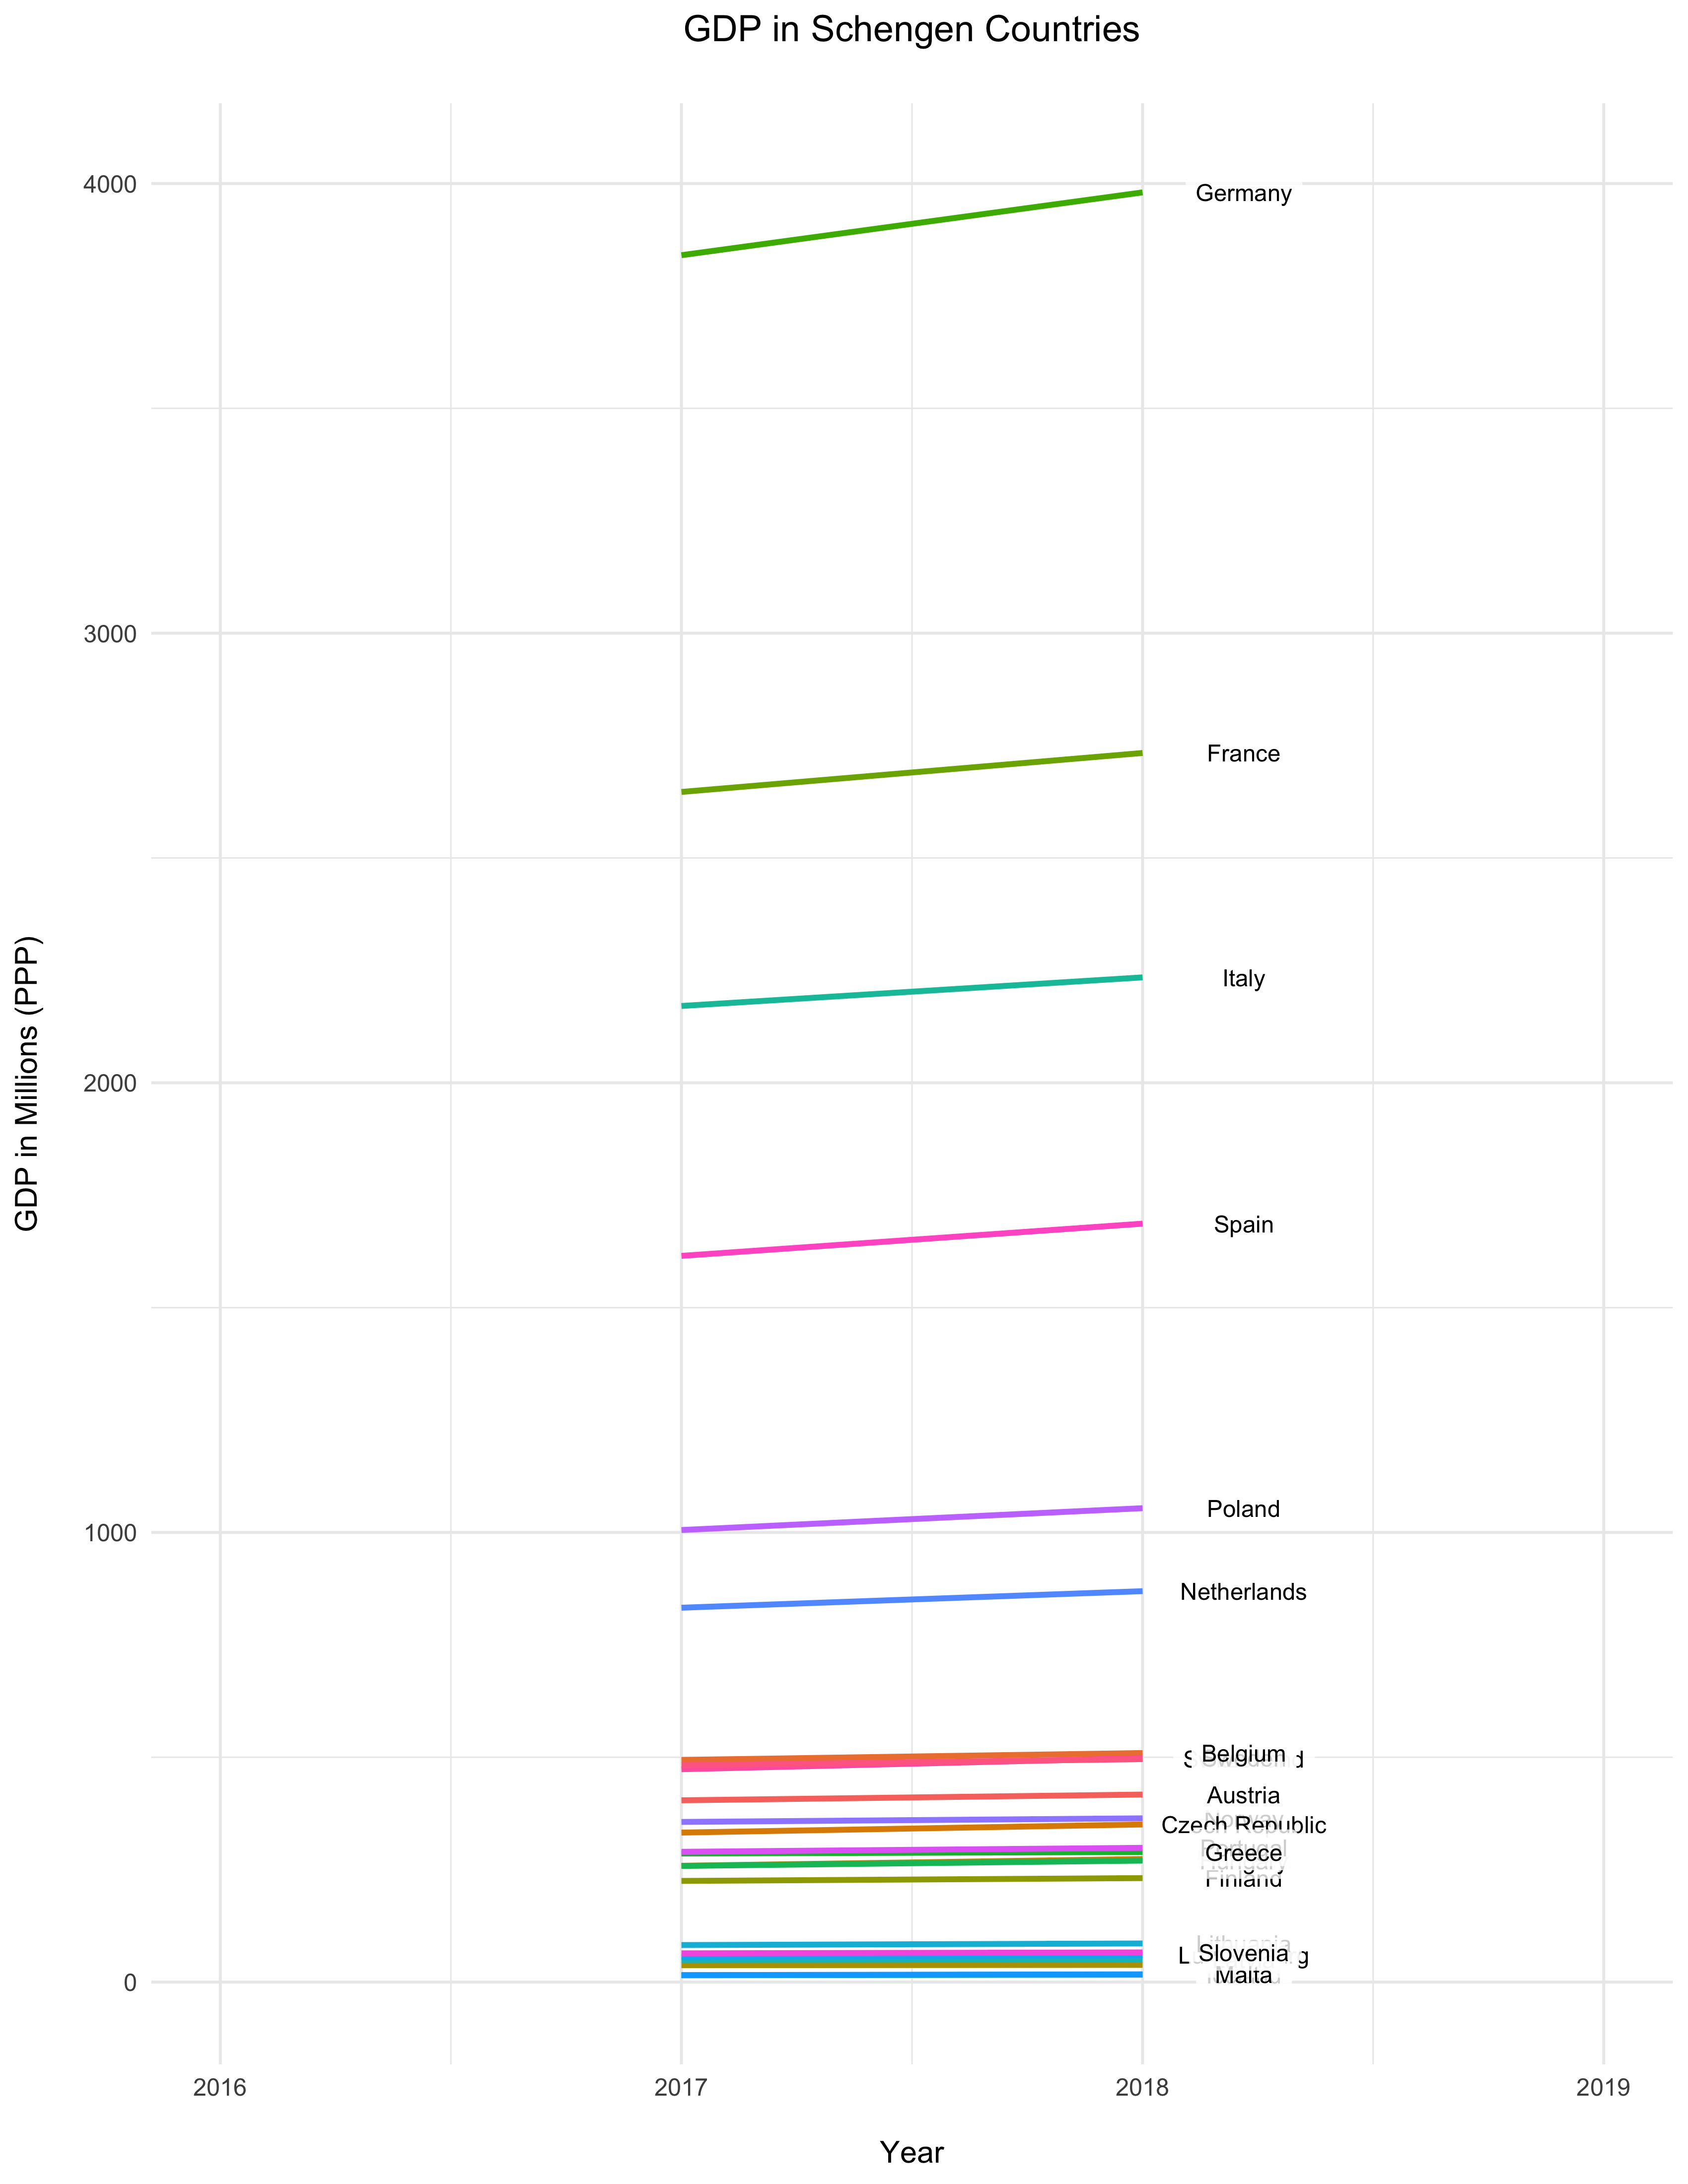

In [468]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + 
    geom_line(aes(x = Year, y = GDP, group = Country, color = Country), size = 1, data = gdp) +
    scale_x_continuous(limits = c(2016, 2019), breaks = seq(2016, 2019, by = 1)) +
    geom_label(aes(x = Year, y = GDP, label = Country), alpha = ifelse(gdp$Year == 2018, 0.8, 0), nudge_x = 0.22, color = ifelse(gdp$Year == 2018, 1, 0), size = 3, alpha = 0.6, label.size = 0, data = gdp) +
    labs(title = 'GDP in Schengen Countries\n', y = 'GDP in Millions (PPP)\n', x = '\nYear') +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5), legend.position = 'none')

# fix y axis scale


In [469]:
%R -i new

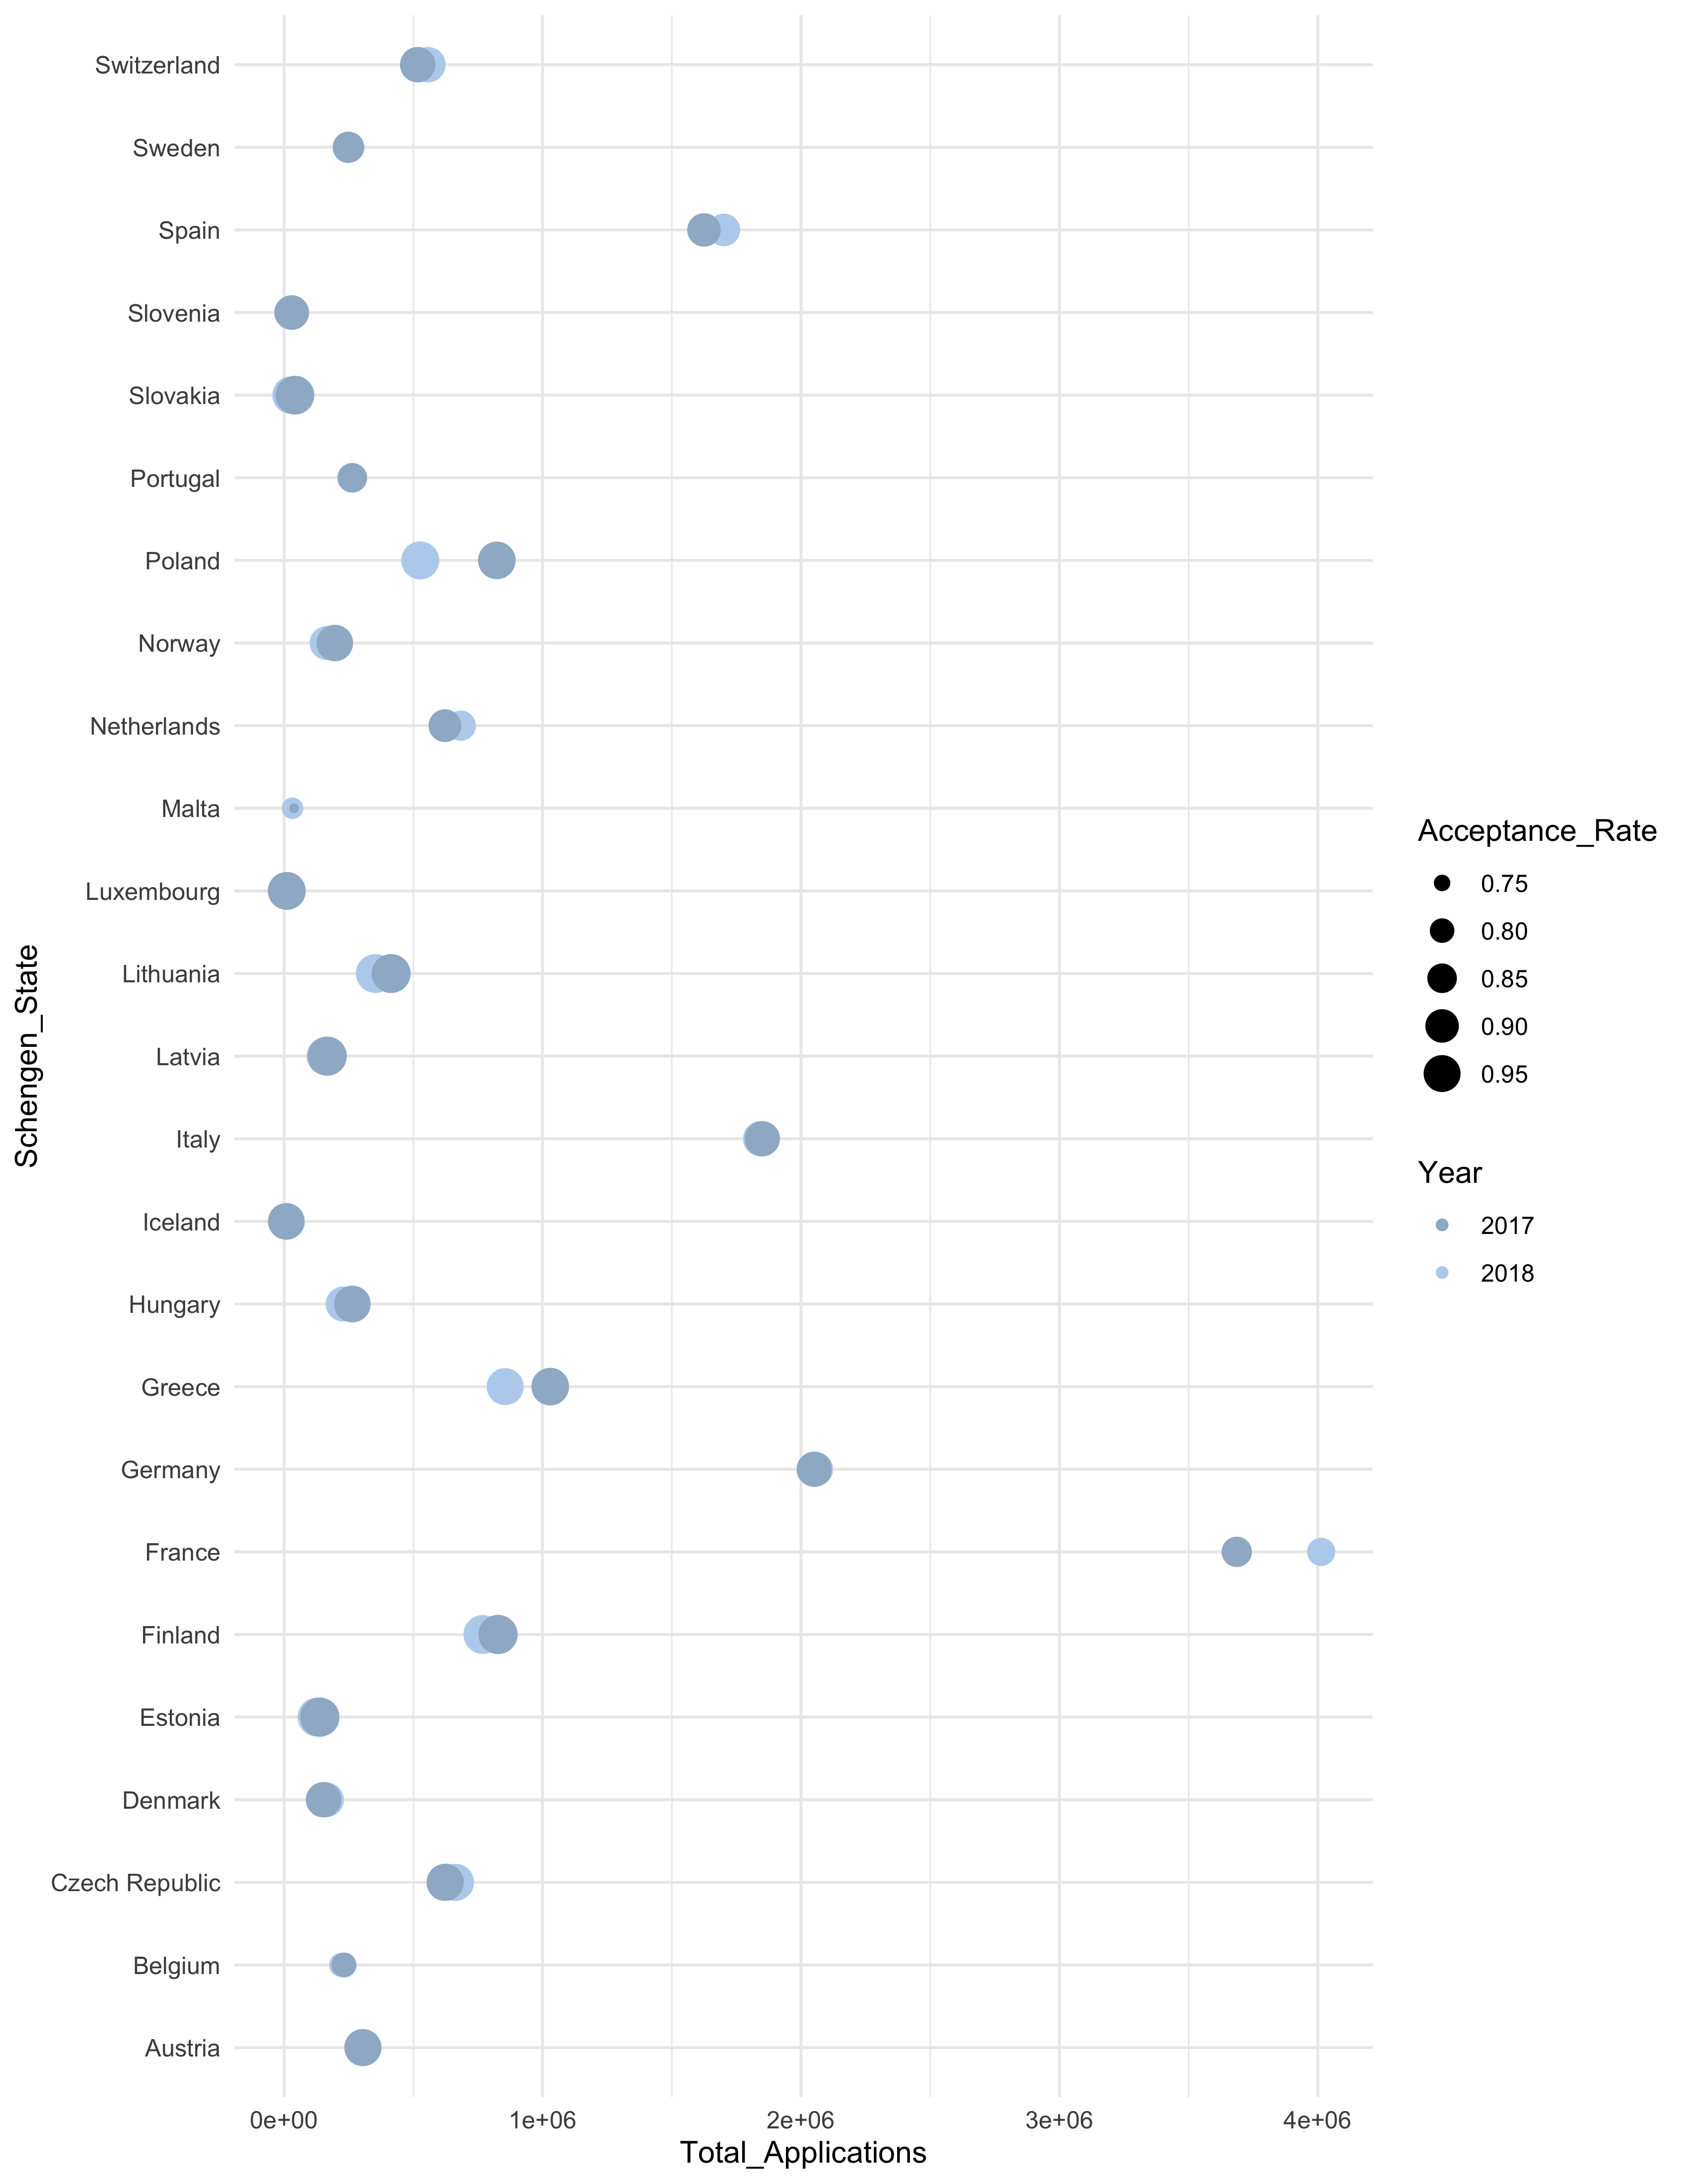

In [470]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + 
geom_point(aes(x = Schengen_State, y = Total_Applications, size = Acceptance_Rate, color = Year), data = new) +
scale_color_manual(values = c('2017'='slategray3','2018'='slategray2')) +
theme_minimal() +
coord_flip()

# make 2018 dots on top of 2017 dots

In [474]:
gdp.Year = gdp.Year.astype(str)
gdp.Year = gdp.Year.str[0:4]
joined = gdp.merge(new, left_on = ['Country','Year'], right_on = ['Schengen_State', 'Year'], how = 'left')
joined

,GDP,Country,Year,Schengen_State,Total_Applications,Total_Issued,Acceptance_Rate
0,496.0,Switzerland,2018,Switzerland,556572.0,515339.0,0.925916
1,38.5,Estonia,2018,Estonia,127561.0,125513.0,0.983945
2,16.5,Iceland,2018,Iceland,9334.0,8856.0,0.948789
3,273.9,Denmark,2018,Denmark,164027.0,149920.0,0.913996
4,59.9,Luxembourg,2018,Luxembourg,10877.0,10475.0,0.963041
5,498.1,Sweden,2018,Sweden,253297.0,216238.0,0.853693
6,869.4,Netherlands,2018,Netherlands,683505.0,586130.0,0.857536
7,86.1,Lithuania,2018,Lithuania,353059.0,346626.0,0.981779
8,364.4,Norway,2018,Norway,164594.0,149089.0,0.905799
9,3980.3,Germany,2018,Germany,2057743.0,1870821.0,0.909162


In [475]:
%R -i joined

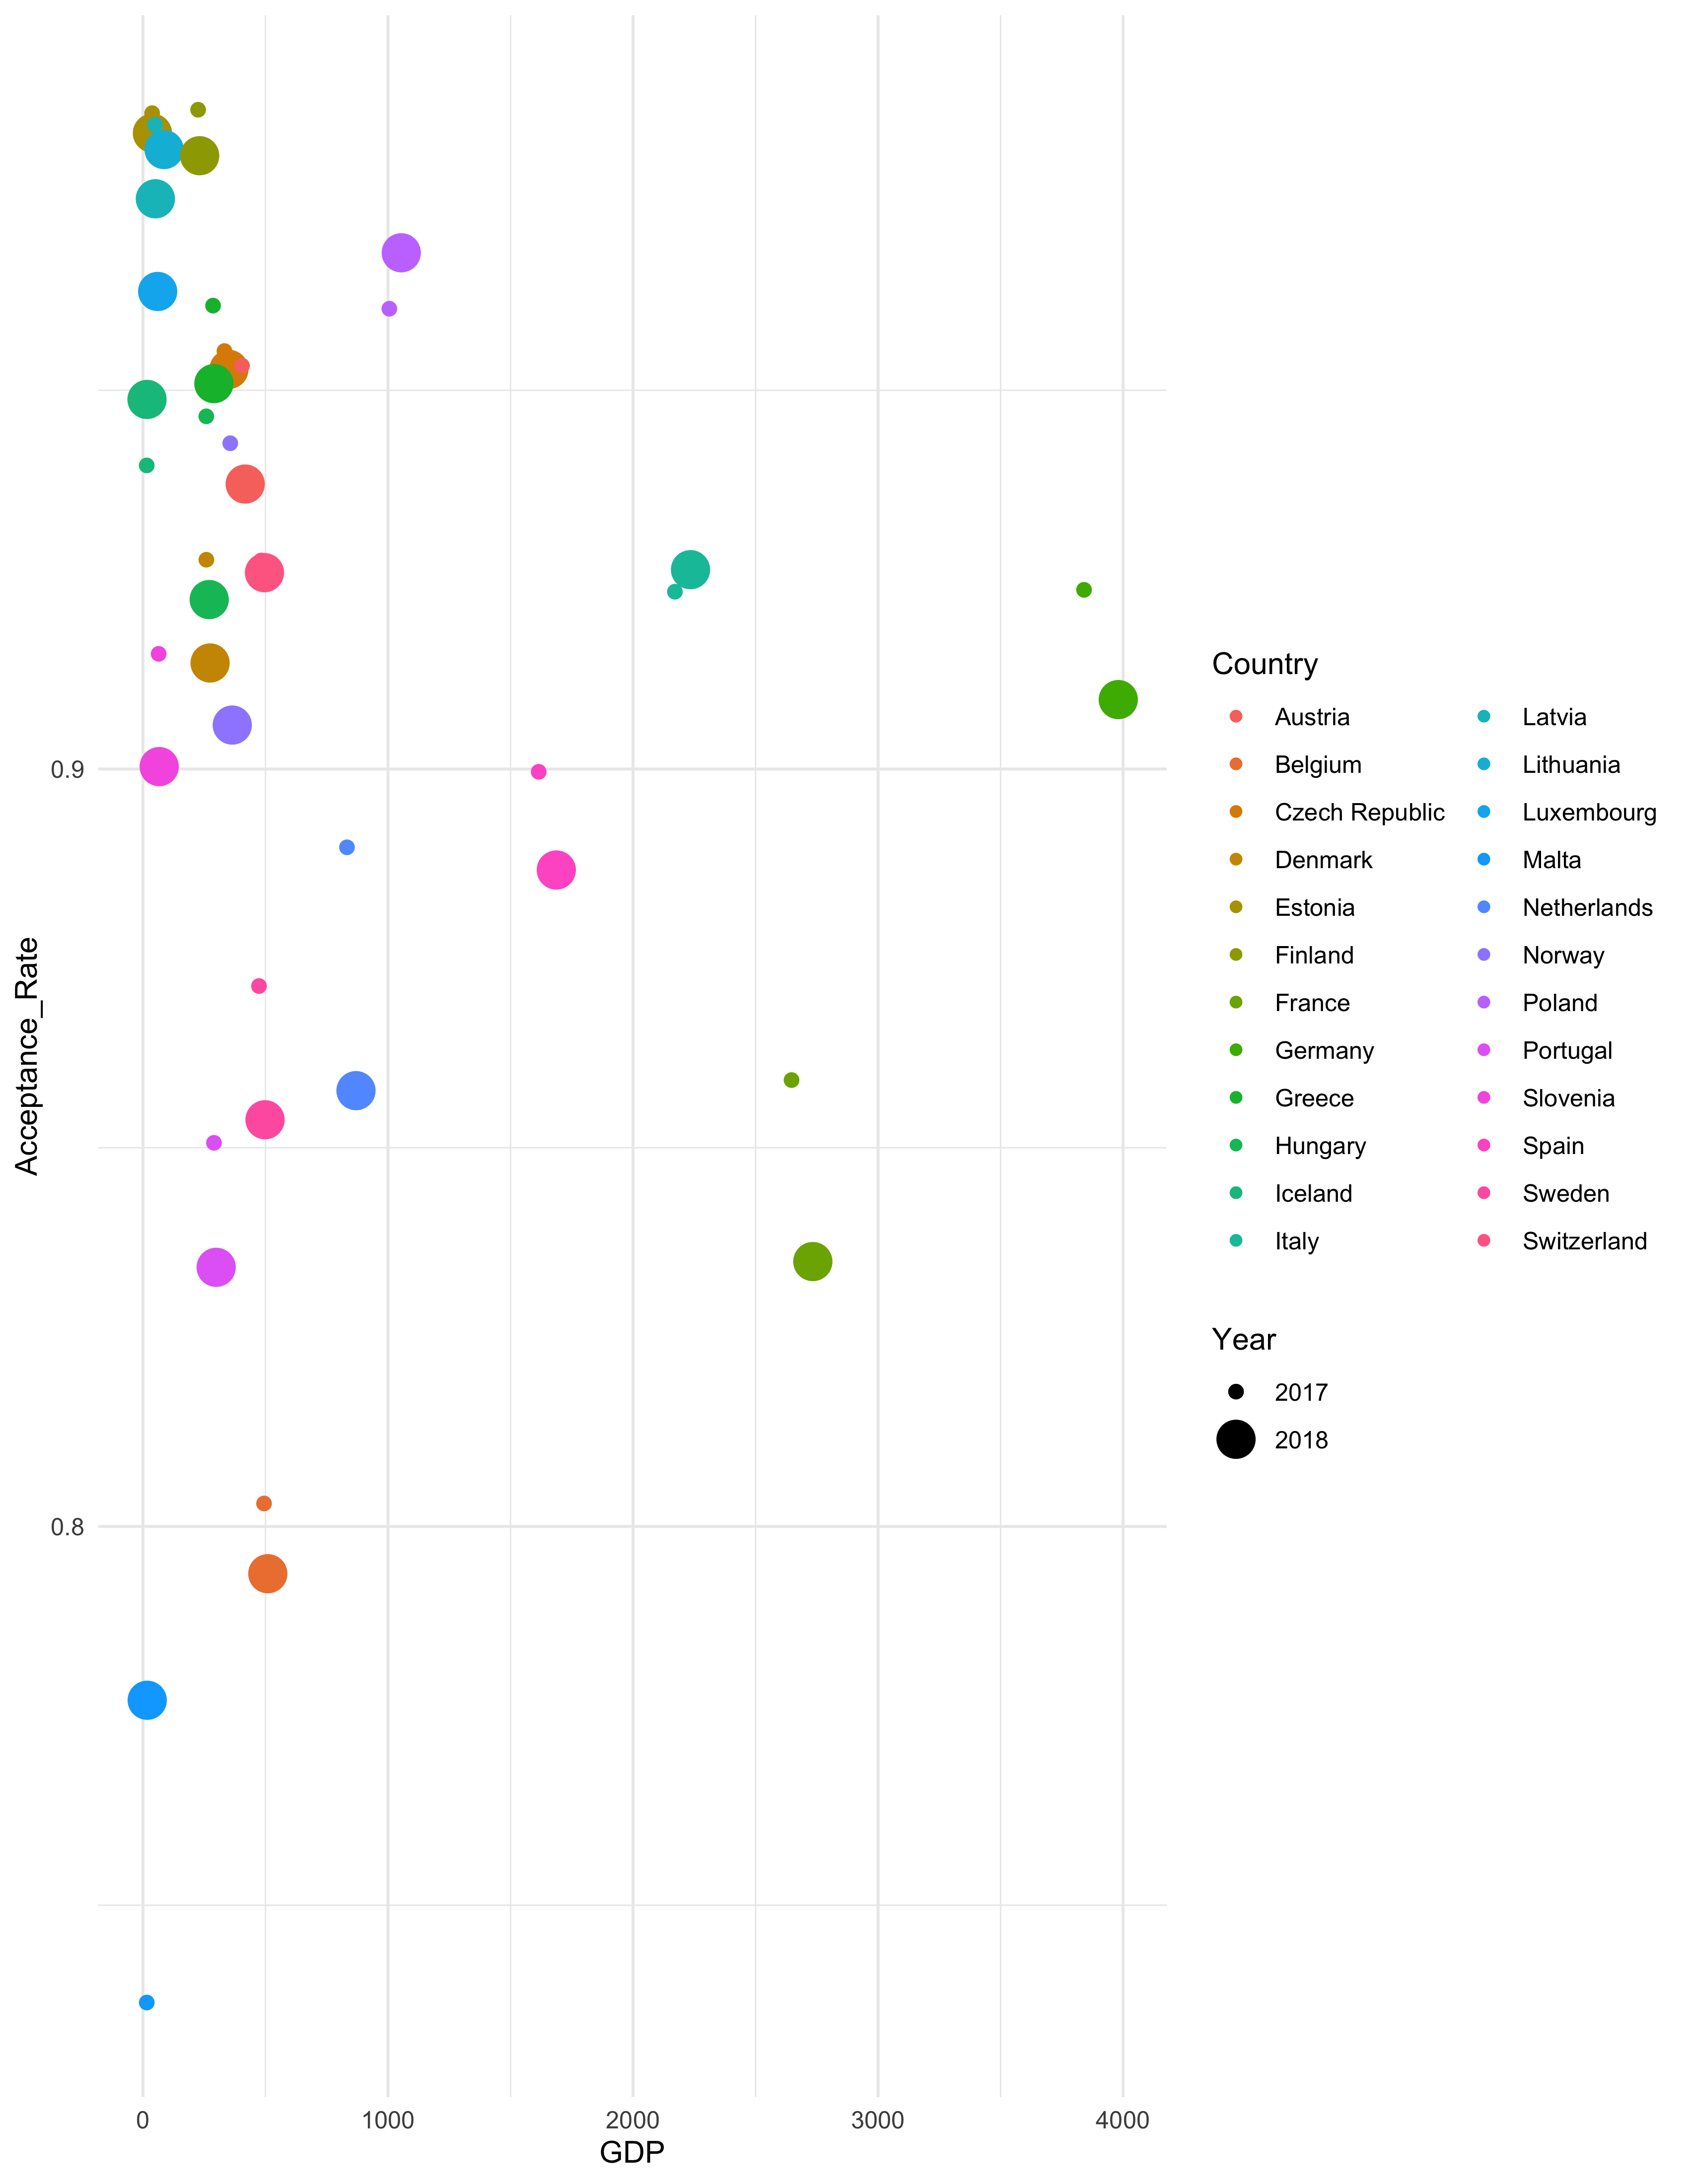

In [486]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + 
geom_point(aes(x = Acceptance_Rate, y = GDP, size = Year, color = Country), data = joined) +
theme_minimal() +
coord_flip()

# add labels

In [487]:
# population versus visas issued? 

In [488]:
# map??? 
# https://www.data-to-viz.com/graph/bubblemap.html
# https://www.r-spatial.org/r/2018/10/25/ggplot2-sf.html
# ggmap